http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### problem statement

#### Prepare rules for the all the data sets 
    1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
    2) Change the minimum length in apriori algorithm
    3) Visulize the obtained rules using different plots 

In [2]:
## Trying to read the problem statement from the text file.
prob = []
with open('Problem_Statment.txt') as f:
    prob = f.read()

In [3]:
prob

'Prepare rules for the all the data sets \n1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values\n2) Change the minimum length in apriori algorithm\n3) Visulize the obtained rules using different plots \n'

In [4]:
# reading and importing the data book.csv for analysis.
rawData = pd.read_csv('book.csv')
rawData

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
## checking info for technical details, such as to total rows, non null cunts, datatype, of the data
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
## checking the count of unique values in each columns. checking if there are any values other than 0 & 1.
for i in rawData.columns:
    print(rawData[i].value_counts())

0    1154
1     846
Name: ChildBks, dtype: int64
0    1505
1     495
Name: YouthBks, dtype: int64
0    1138
1     862
Name: CookBks, dtype: int64
0    1436
1     564
Name: DoItYBks, dtype: int64
0    1571
1     429
Name: RefBks, dtype: int64
0    1518
1     482
Name: ArtBks, dtype: int64
0    1448
1     552
Name: GeogBks, dtype: int64
0    1773
1     227
Name: ItalCook, dtype: int64
0    1926
1      74
Name: ItalAtlas, dtype: int64
0    1903
1      97
Name: ItalArt, dtype: int64
0    1783
1     217
Name: Florence, dtype: int64


looking at the data we can see that each feature is a category of books, the last column florance looks like a single book, i tried to search on the internet but there are books with the tile florence. Actualy florence is place in Italy. For our research we shall treat it as a category of book. 

all columns are non null values with 2000 entries and all have binary values(0,1) meaning yes and no. hence treating 1 as yes and 0 as no. rather we can 1 means sale and 0 means no sale.

it is a perfect data for applying aprori algoritham.

In [7]:
from mlxtend.frequent_patterns import apriori,association_rules

In [8]:
import numpy as np

In [9]:
# extracting the frequent items and their scores for combinations of benchmark support and no of items for combinations

Bench_support = []
noItemsForCombos = []
Total_Combos = []
Max_support = []
Max_sup_combo = []
Min_support = []
Min_sup_combo = []

for i in np.linspace(0.0001,0.4,5):
    for x in range(len(rawData.columns)+1,1,-1):
    
        frequent_items = apriori(rawData,min_support=i,use_colnames=True,max_len=x)
        Bench_support.append(np.round(i,4))
        noItemsForCombos.append(x)
        Total_Combos.append(frequent_items.shape[0])
        Max_support.append(np.array((frequent_items.iloc[0:1,0:1])))
        Max_sup_combo.append(np.array((frequent_items.iloc[0:1,1:])))
        Min_support.append(np.array((frequent_items.iloc[-1:,:1])))
        Min_sup_combo.append(np.array((frequent_items.iloc[-1:,1:])))

In [10]:
# Making a dataframe out of extracted frequent items and their scores

pd.DataFrame(
    {'Bench_support':Bench_support,'noItemsForCombos':noItemsForCombos,'Qualify_Combos':Total_Combos,
     'Max_support':Max_support,'Max_sup_combo':Max_sup_combo,'Min_support':Min_support,'Min_sup_combo':Max_sup_combo
    },
    columns=['Bench_support','noItemsForCombos','Qualify_Combos','Max_support','Max_sup_combo',
             'Min_support','Min_sup_combo']
            )

,Bench_support,noItemsForCombos,Qualify_Combos,Max_support,Max_sup_combo,Min_support,Min_sup_combo
0,0.0001,12,2047,[[0.423]],[[(ChildBks)]],[[0.001]],[[(ChildBks)]]
1,0.0001,11,2047,[[0.423]],[[(ChildBks)]],[[0.001]],[[(ChildBks)]]
2,0.0001,10,2046,[[0.423]],[[(ChildBks)]],[[0.001]],[[(ChildBks)]]
3,0.0001,9,2035,[[0.423]],[[(ChildBks)]],[[0.001]],[[(ChildBks)]]
4,0.0001,8,1980,[[0.423]],[[(ChildBks)]],[[0.001]],[[(ChildBks)]]
5,0.0001,7,1815,[[0.423]],[[(ChildBks)]],[[0.002]],[[(ChildBks)]]
6,0.0001,6,1485,[[0.423]],[[(ChildBks)]],[[0.002]],[[(ChildBks)]]
7,0.0001,5,1023,[[0.423]],[[(ChildBks)]],[[0.002]],[[(ChildBks)]]
8,0.0001,4,561,[[0.423]],[[(ChildBks)]],[[0.002]],[[(ChildBks)]]
9,0.0001,3,231,[[0.423]],[[(ChildBks)]],[[0.004]],[[(ChildBks)]]


### Interpretation
    Above Dataframe is constructed for benchmark support ranging from .0001 to .40. (the upper range is limited to .4 as highest support for any column is .423) and also minimum combination to consider from 1 to 11 as the range of columns or categories suggest.
#### observations
    the product cobminations are as high as 2047 and as low as 2
    the as the bench_mark Support increases the combinatinos go down
    as the no of items for combinations increase the combination increase normal as if n is more no of combination are more.
    irrespective of benchmark support maximum support remains constant menaing that is most popular category.
    product combinations are not showing properly.
    
    INTERESTINGLY IF WE NOTICE AS THE BENCHMARK SUPPORT INCREASES THE NO OF ITEMS FOR COMBINATION DO NOT MATTER AS EVEN THOUGH THE NO OF COMBINATIONS INCREASE BUT THE NUMBER OF QUALIFYING COMBINATIONS REMAIN THE SAME. IN OUR CASE AT BENCH MARK 10% THE NO OF QUALIFYING COMBINATIONS REMAIN CONSTANT AT 39. (FOR ITEMS FOR COMBE 3 OR MORE. ONLY PRODUCT COMBO 2 ITEMS HAS LESS NUMBER)
    
**SO THE IDEAL BENCHMARK = 10% AND PRODUCT COMBINATION LIMIT = 3 (THE BENCH MARK IS POTENTIALLY DECIDED BASED ON DOMAIN EXPERTICE BUT IN THIS CASE I AM USING NUMBERS) **

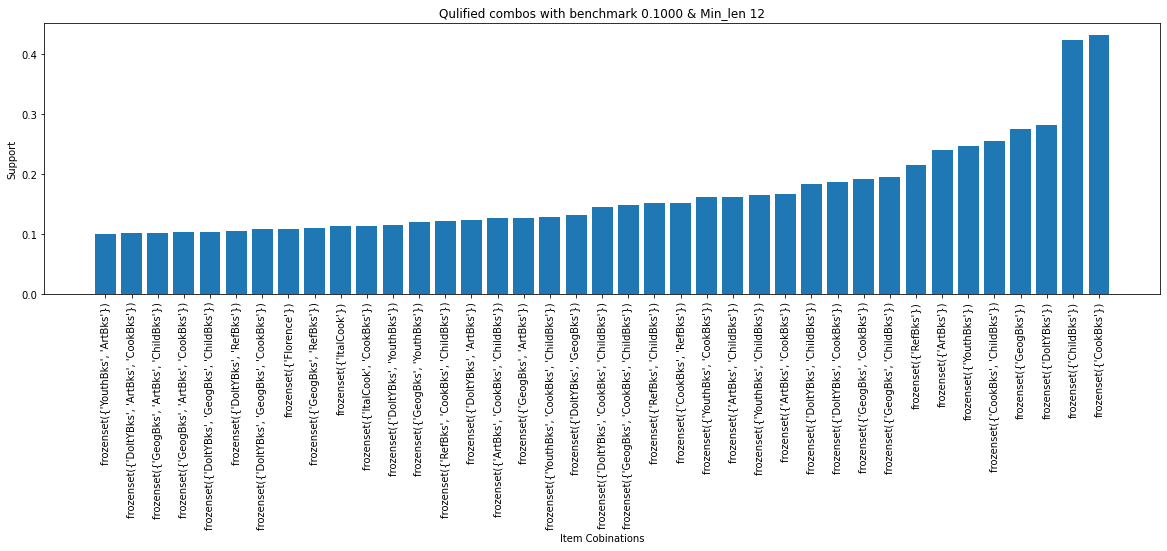

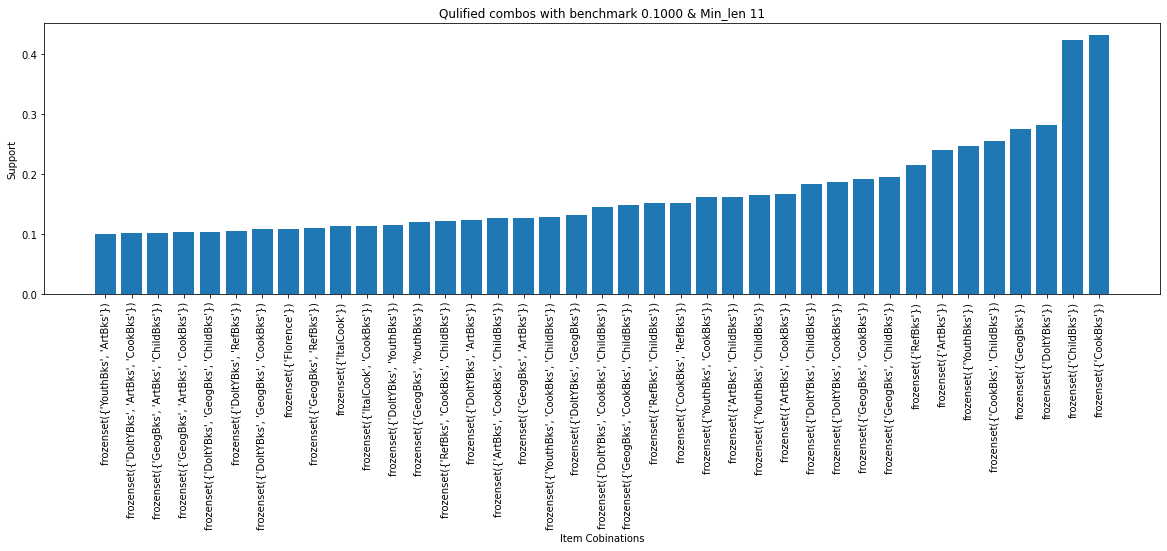

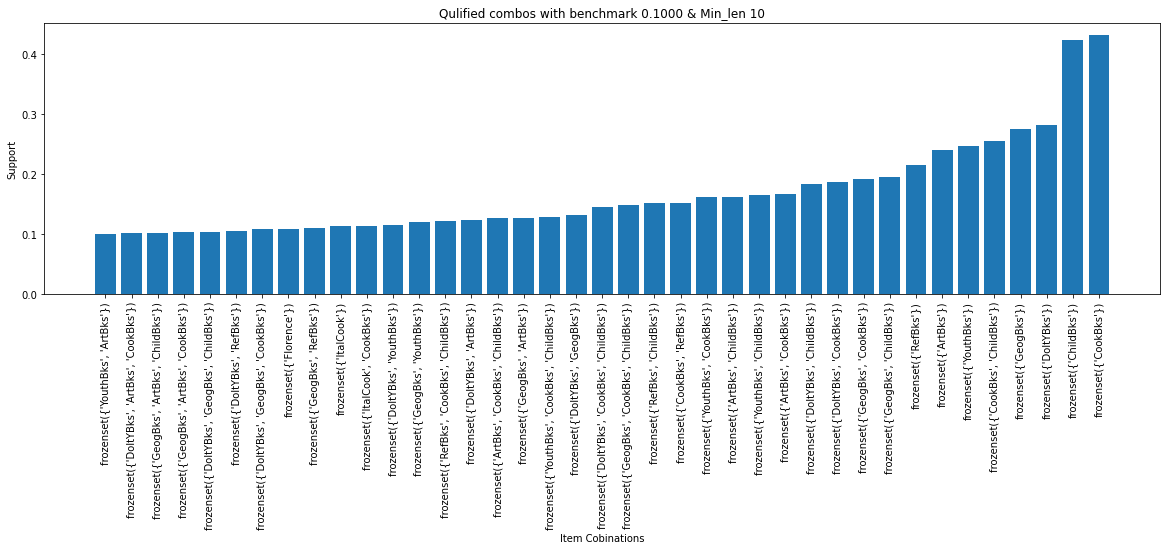

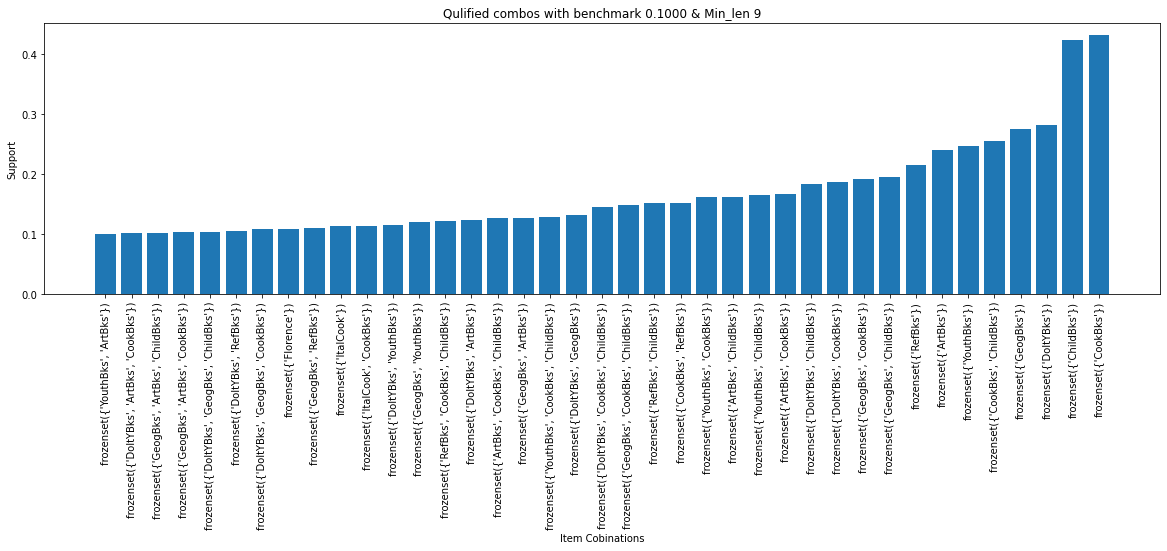

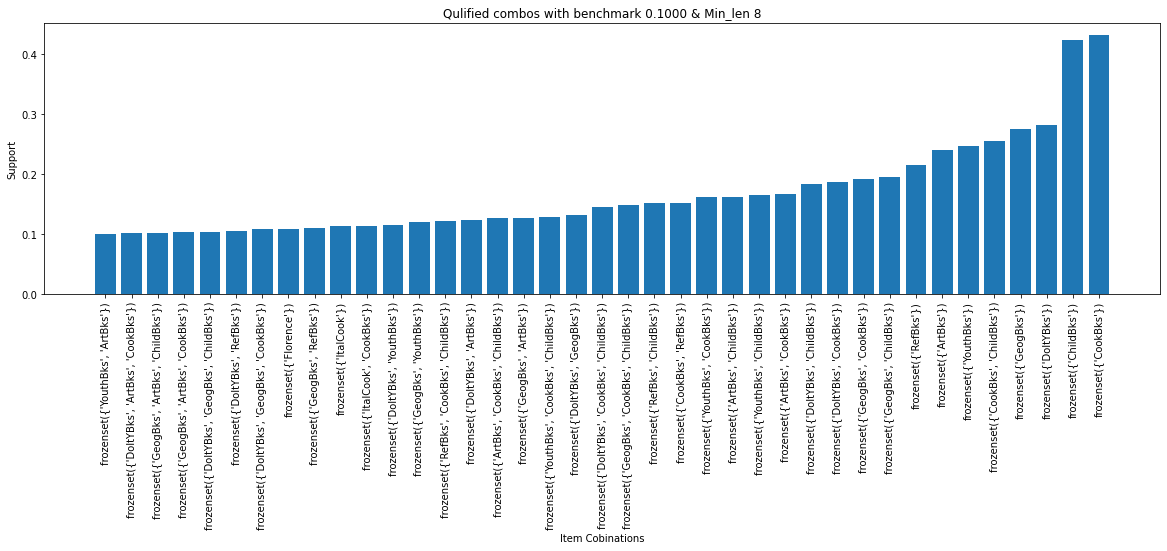

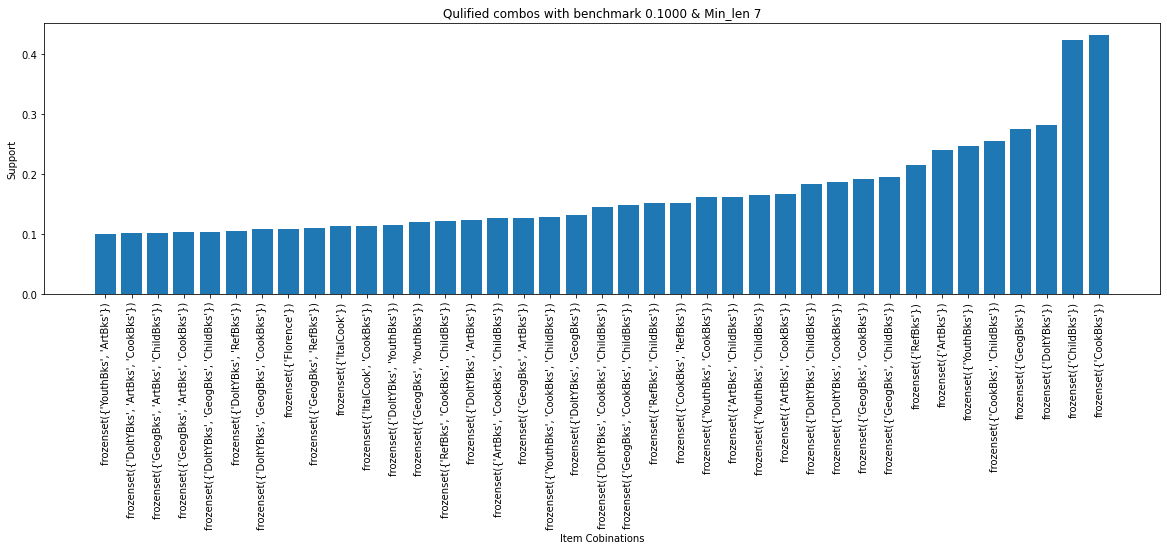

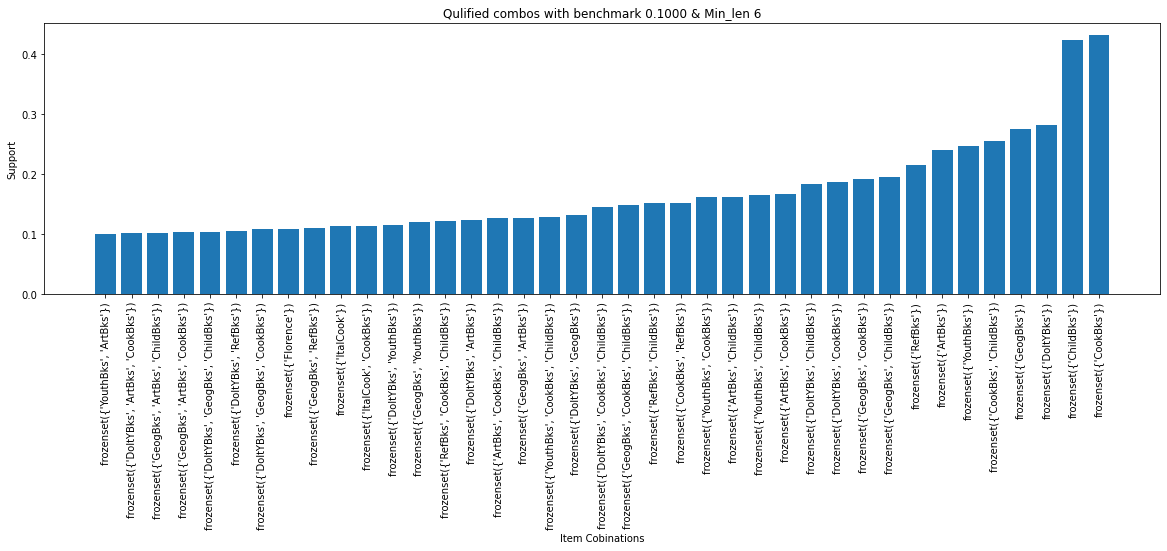

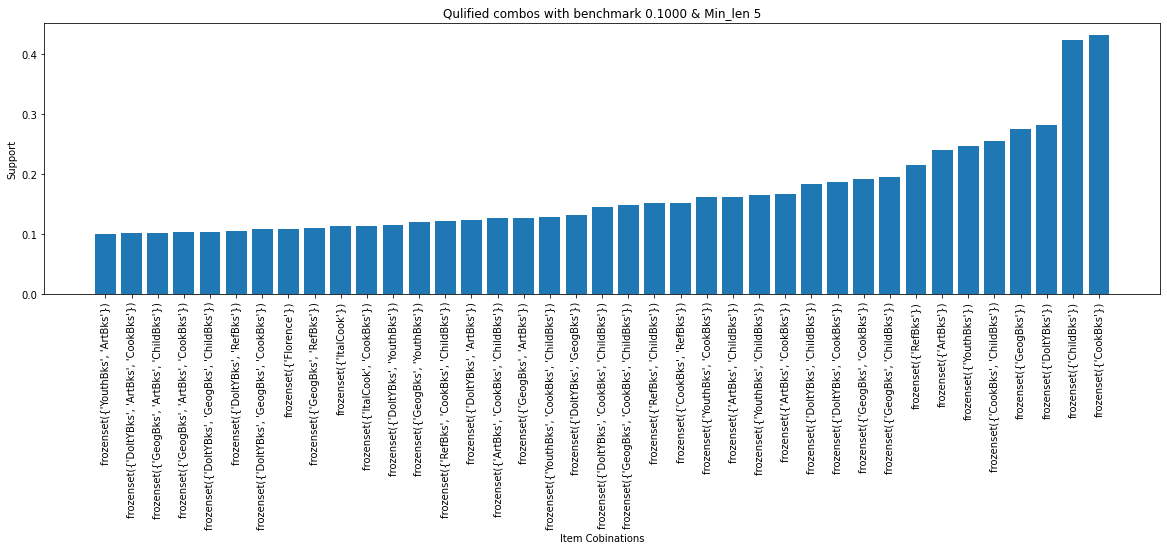

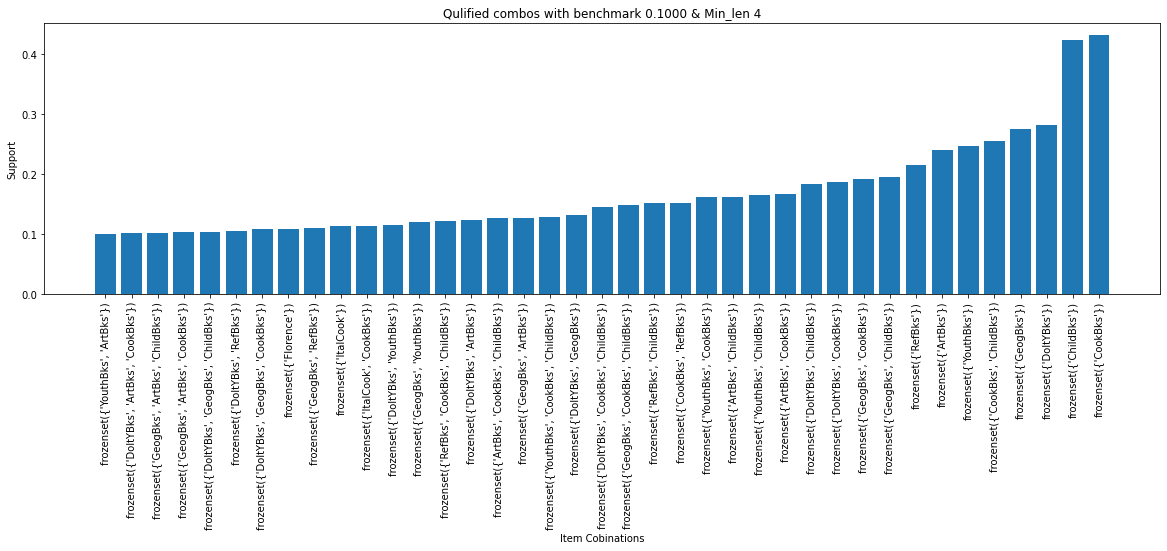

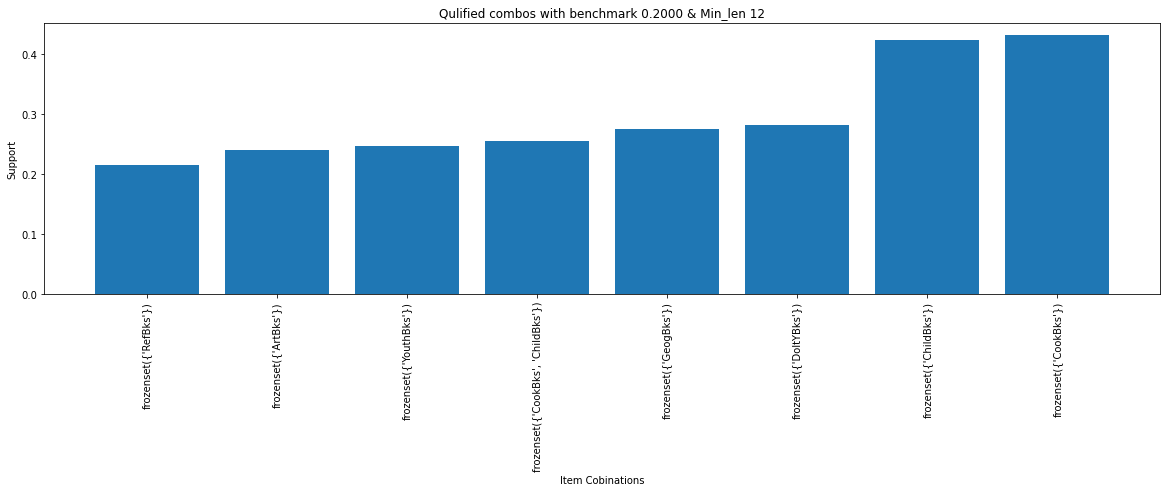

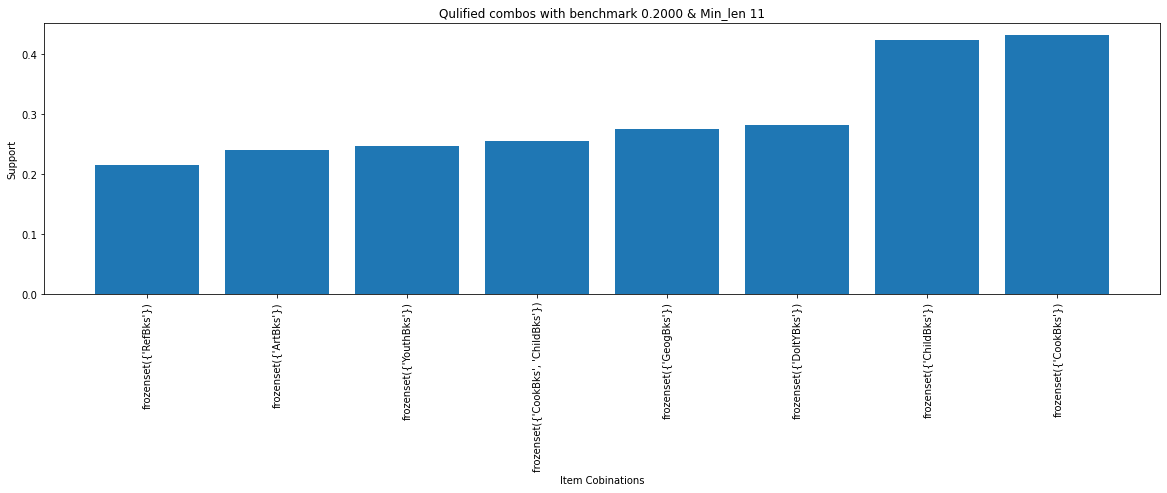

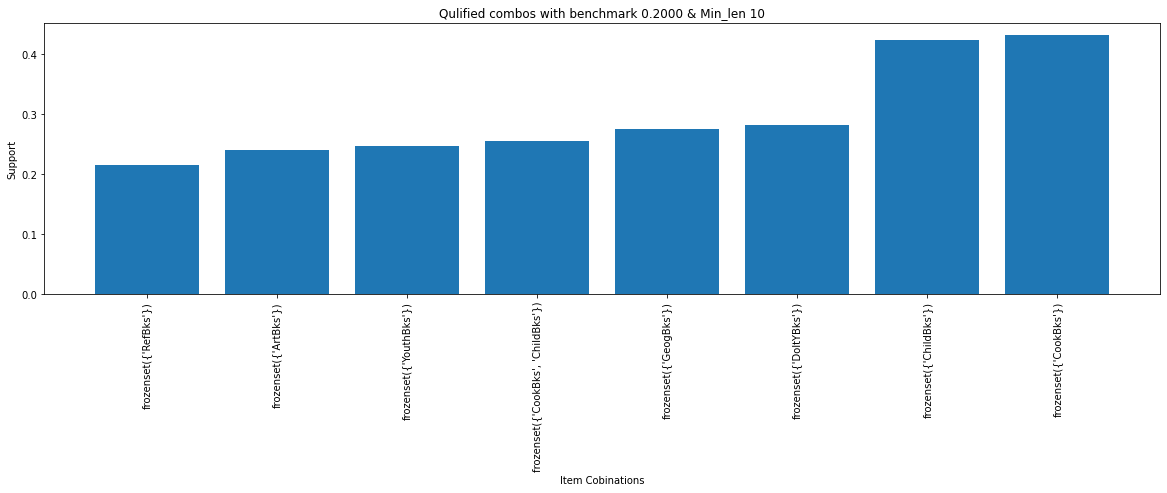

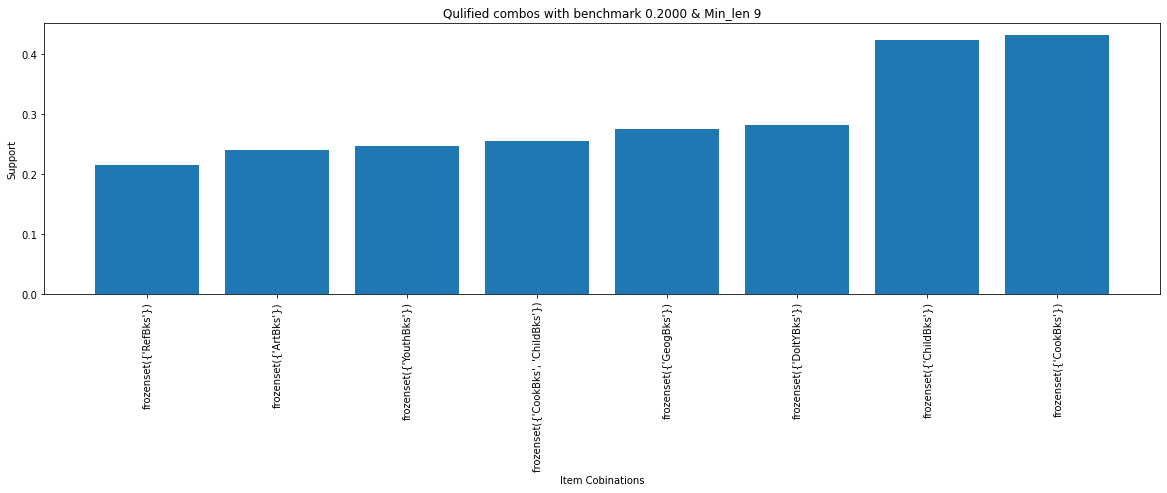

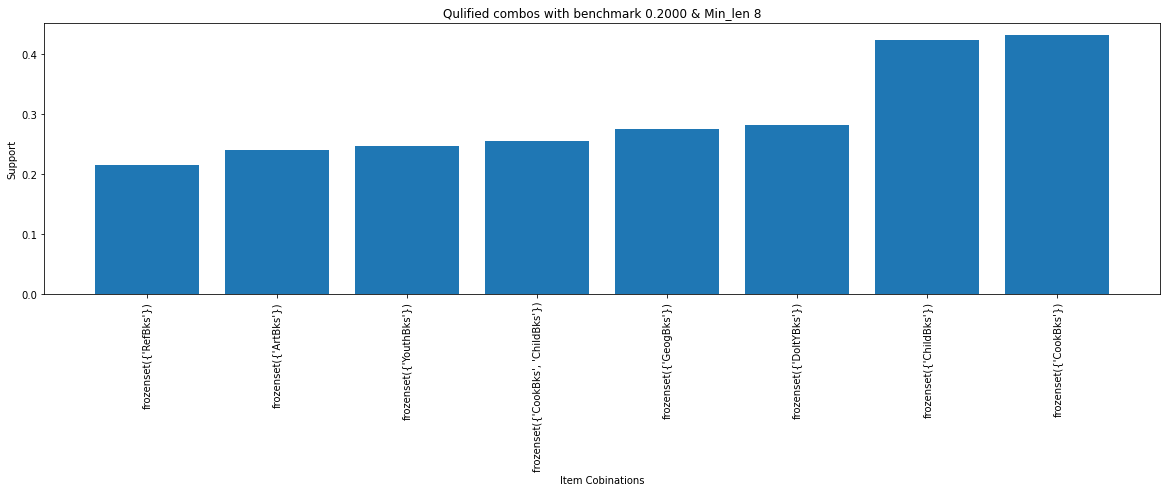

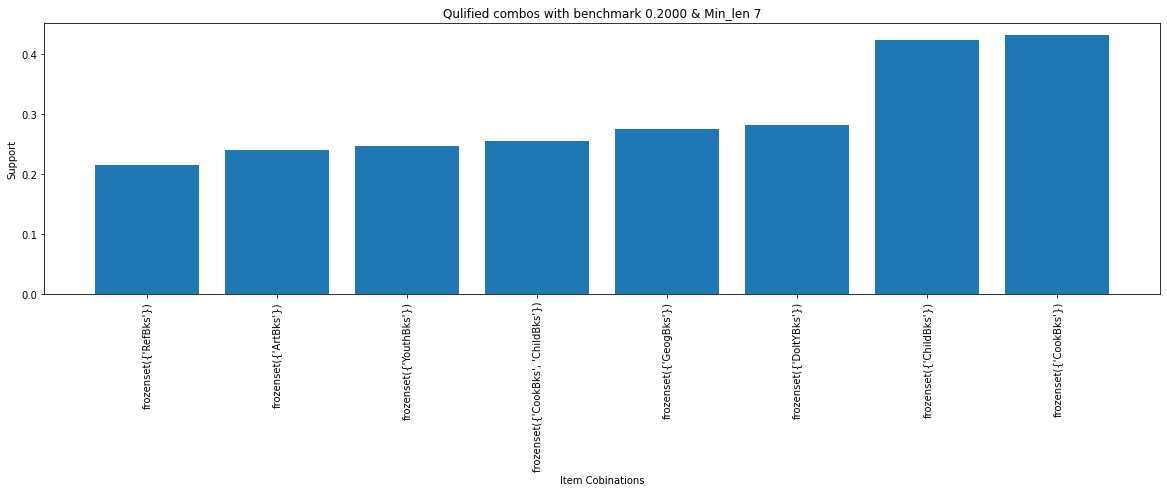

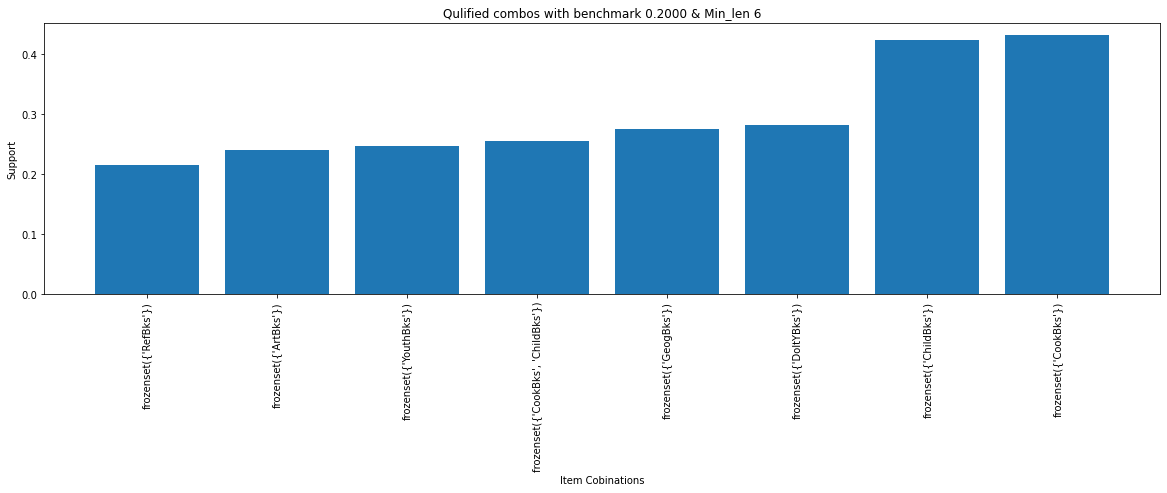

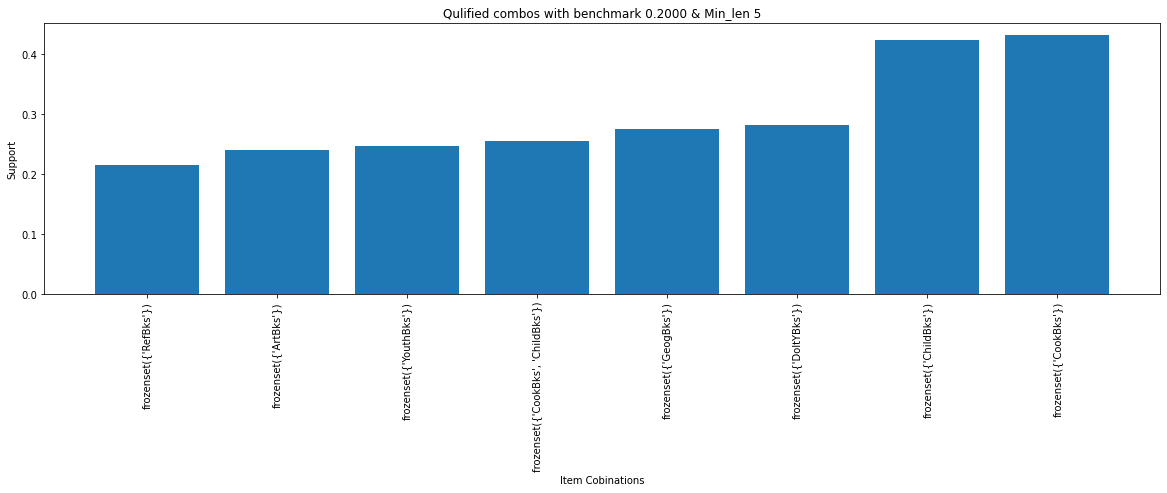

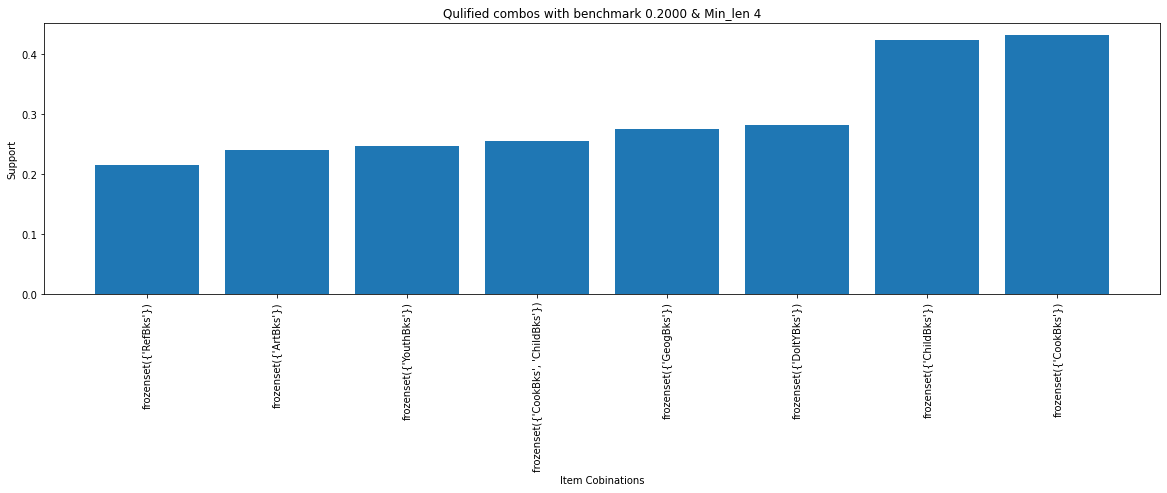

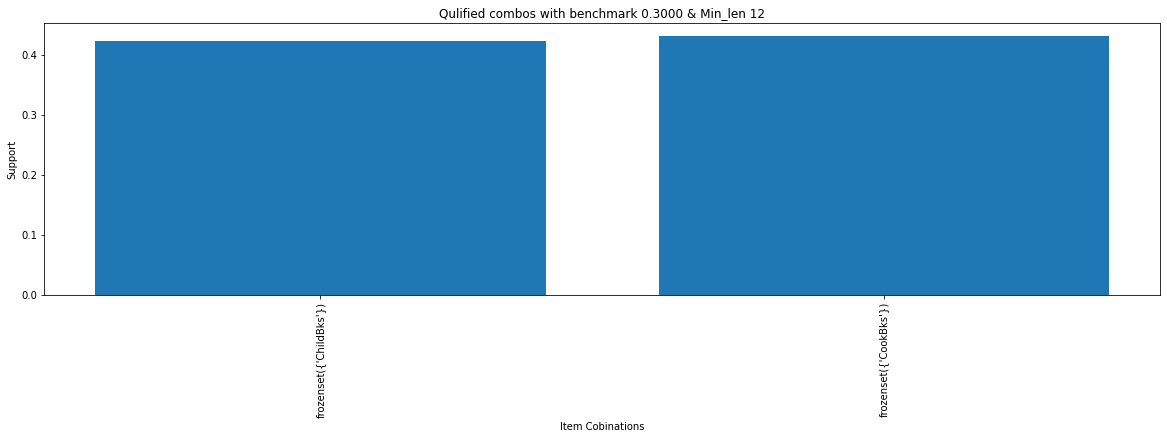

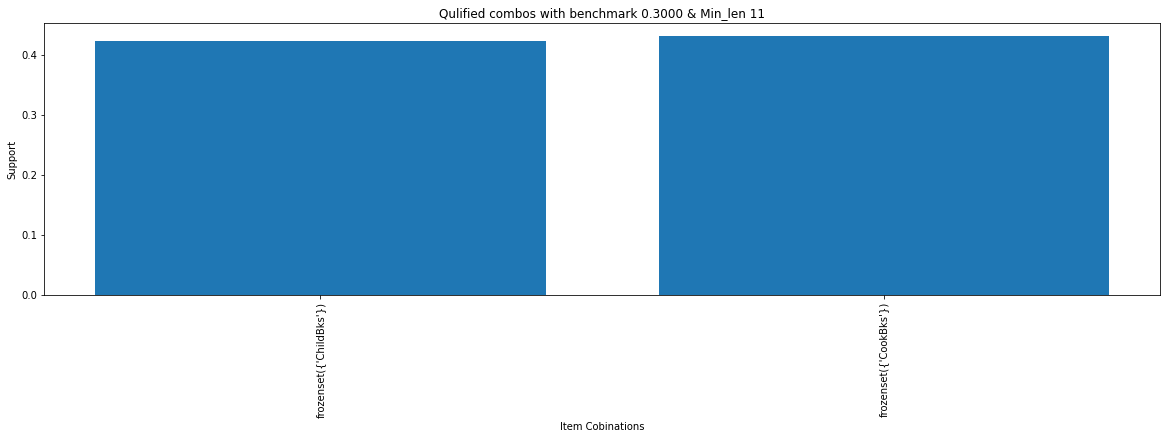

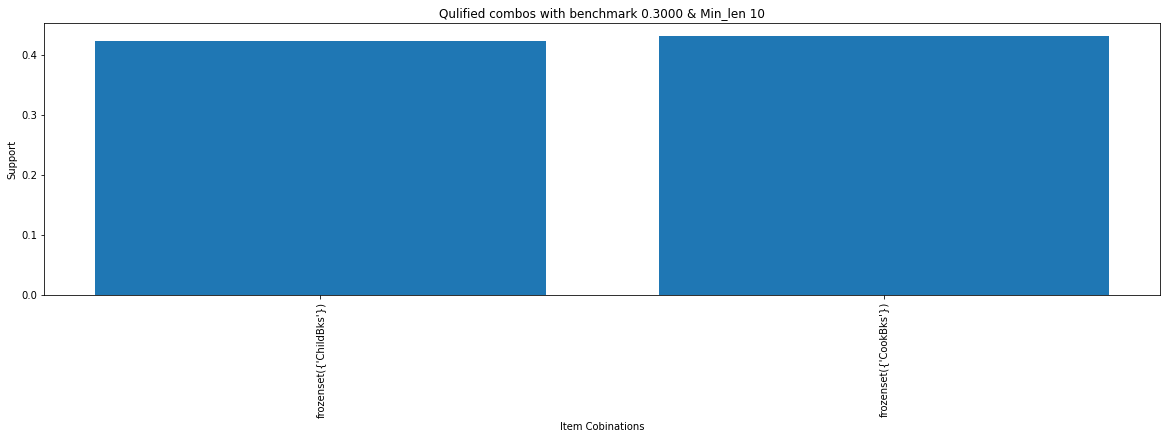

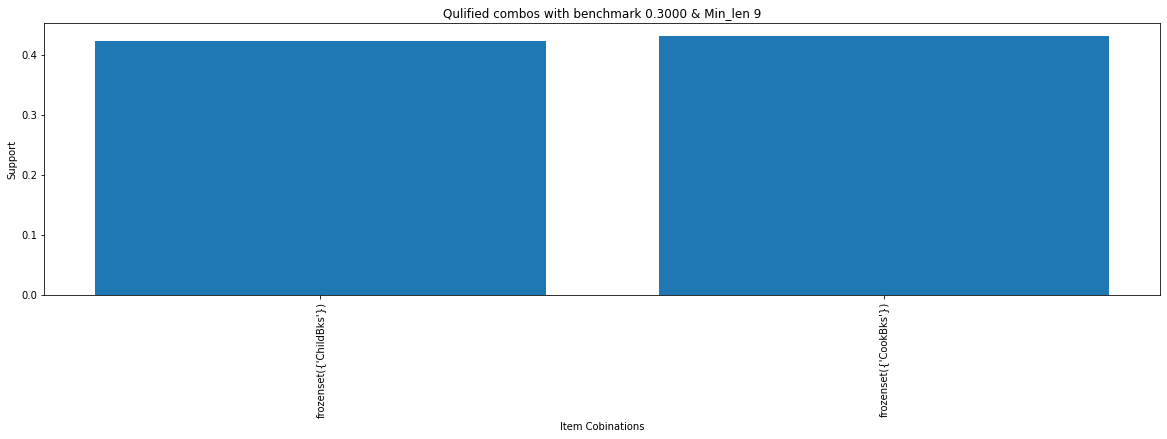

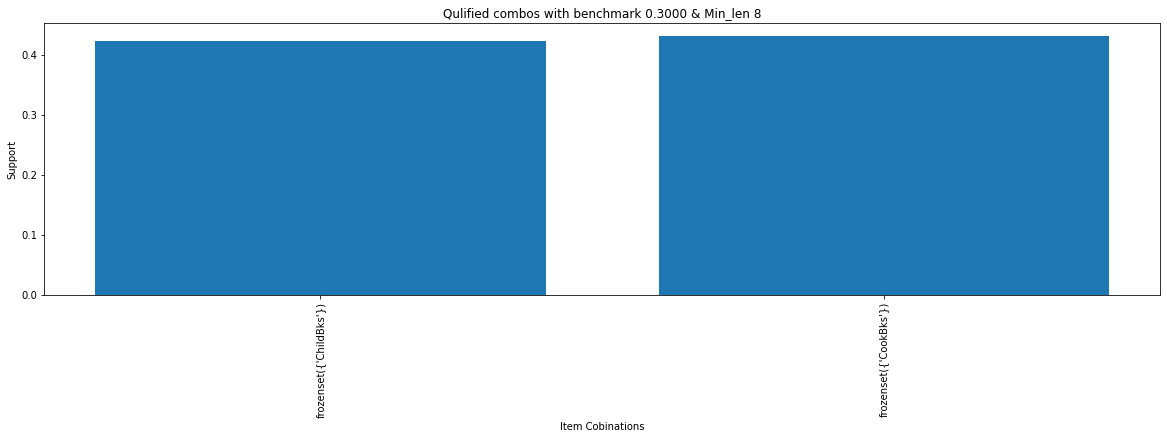

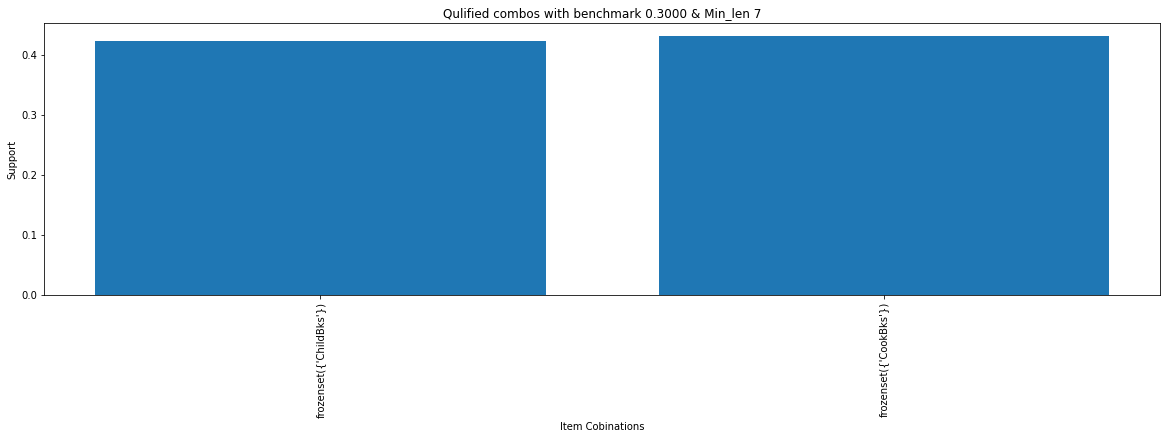

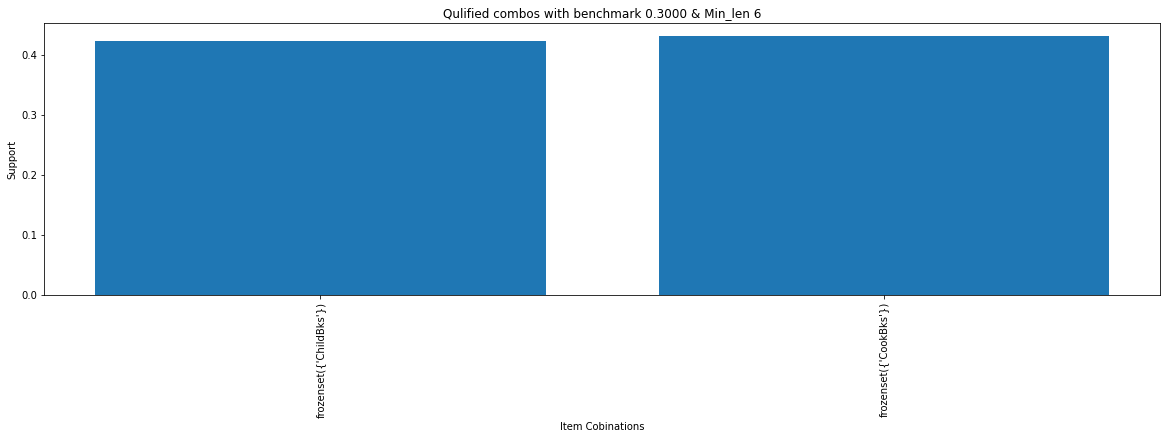

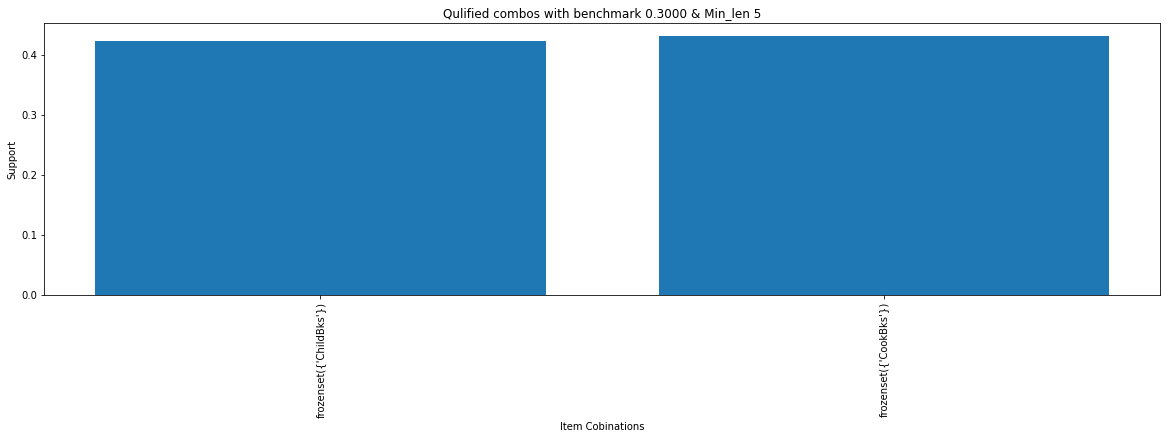

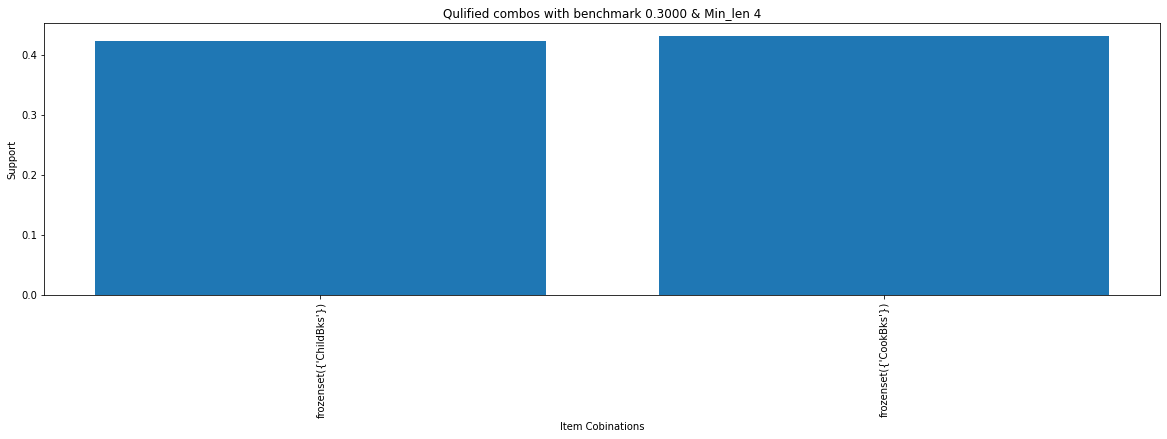

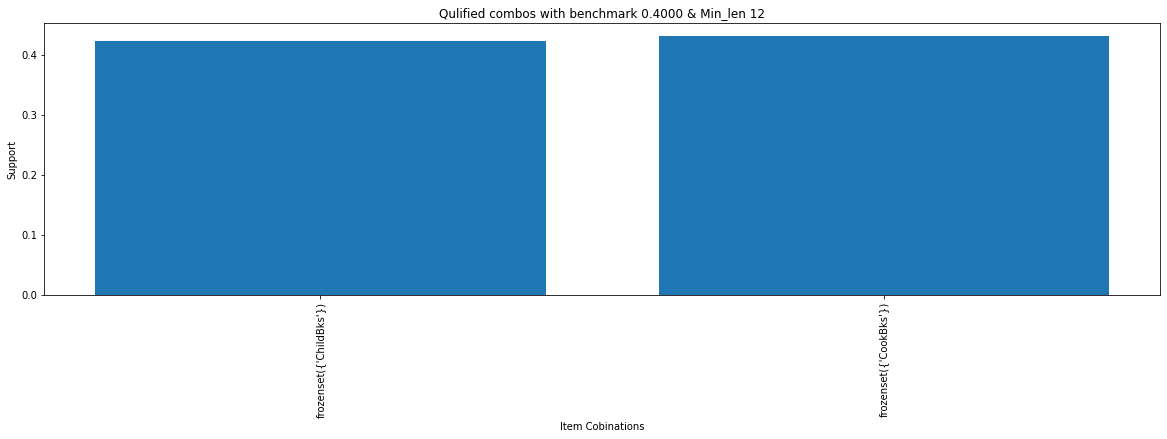

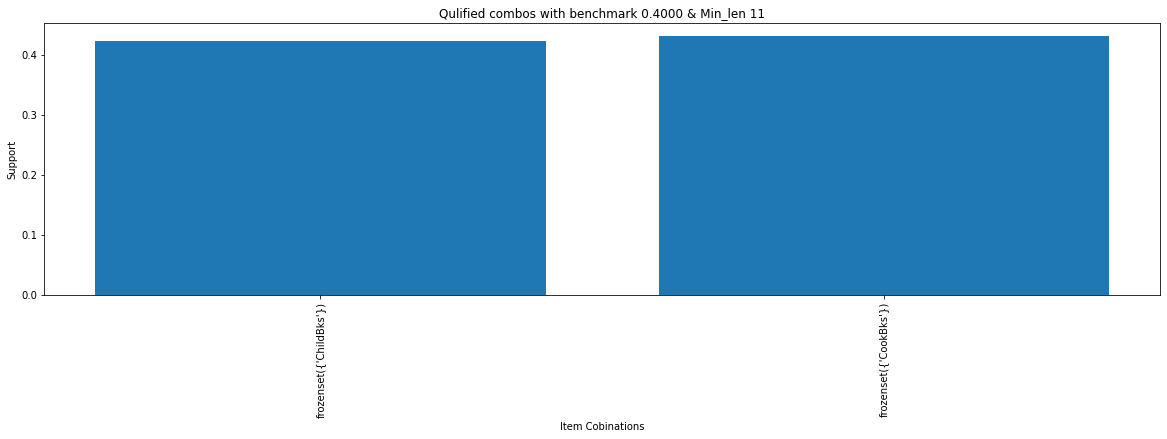

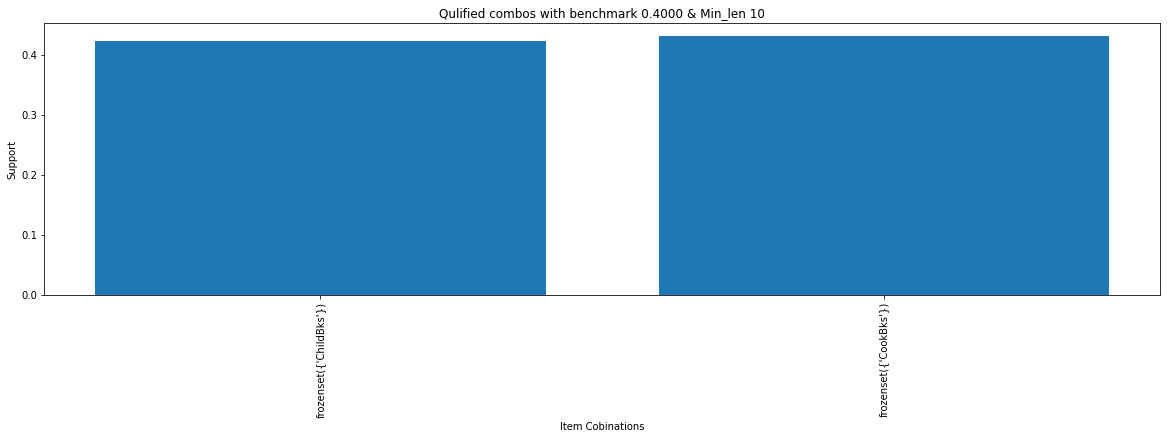

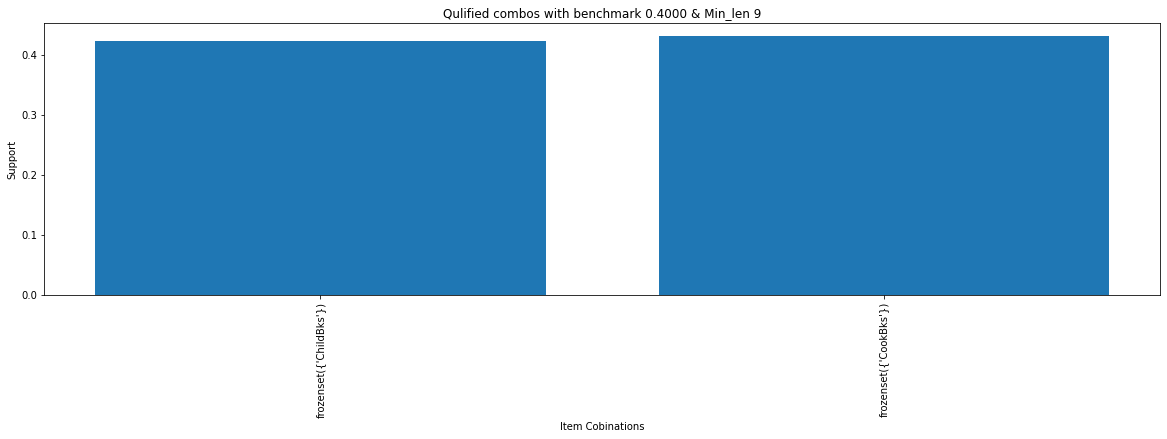

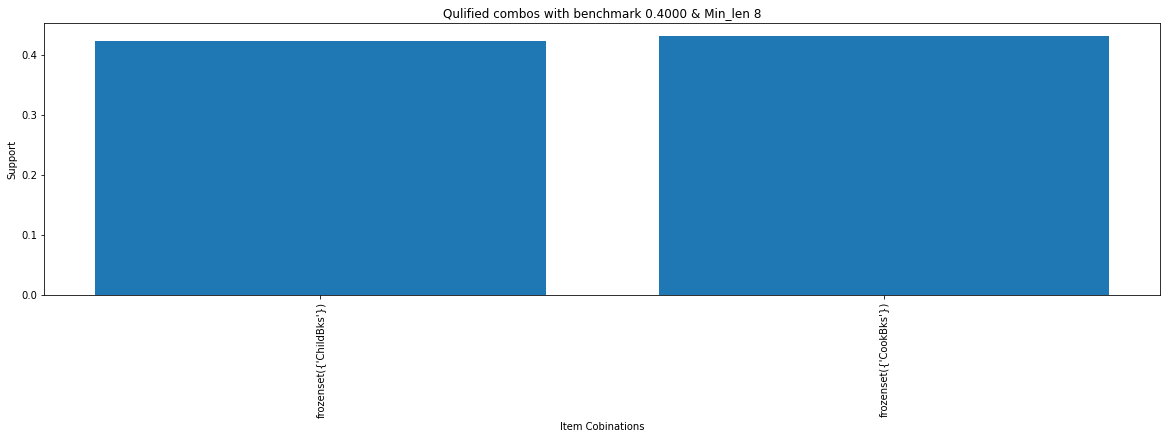

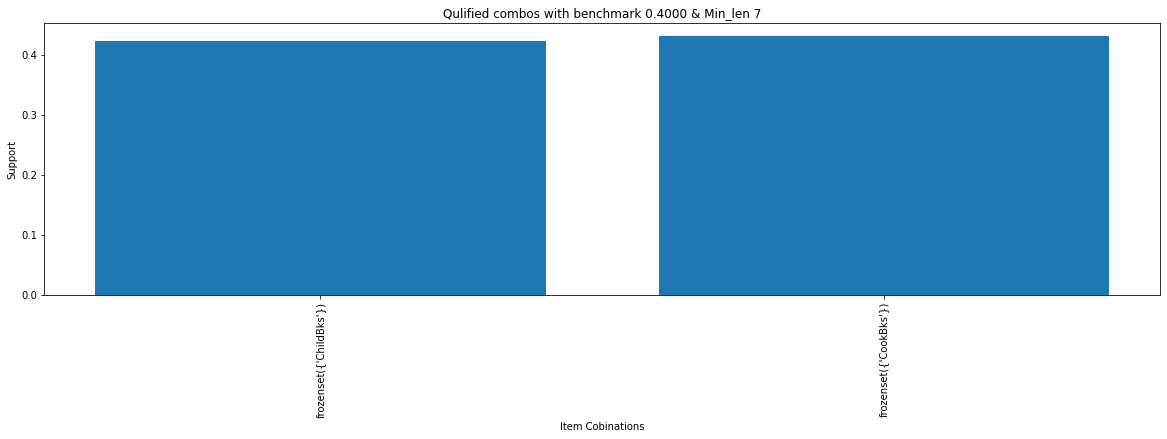

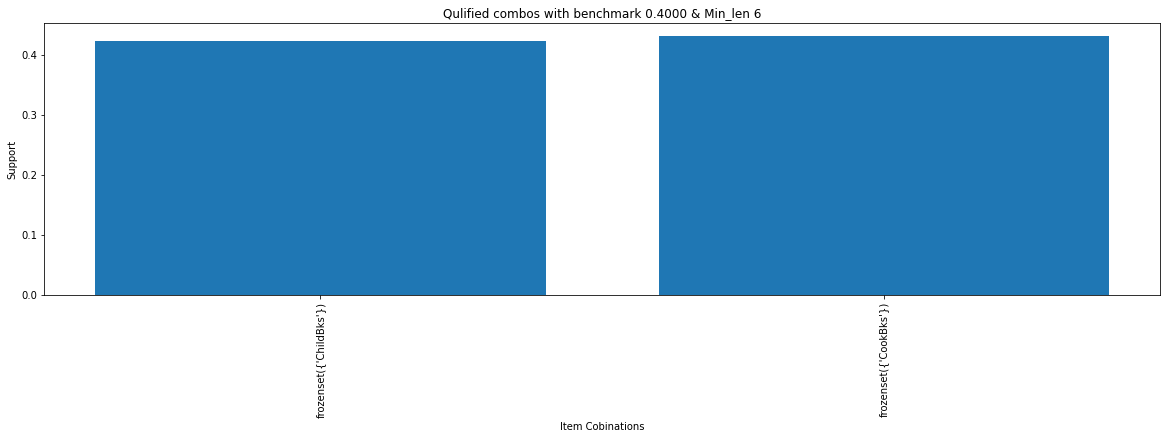

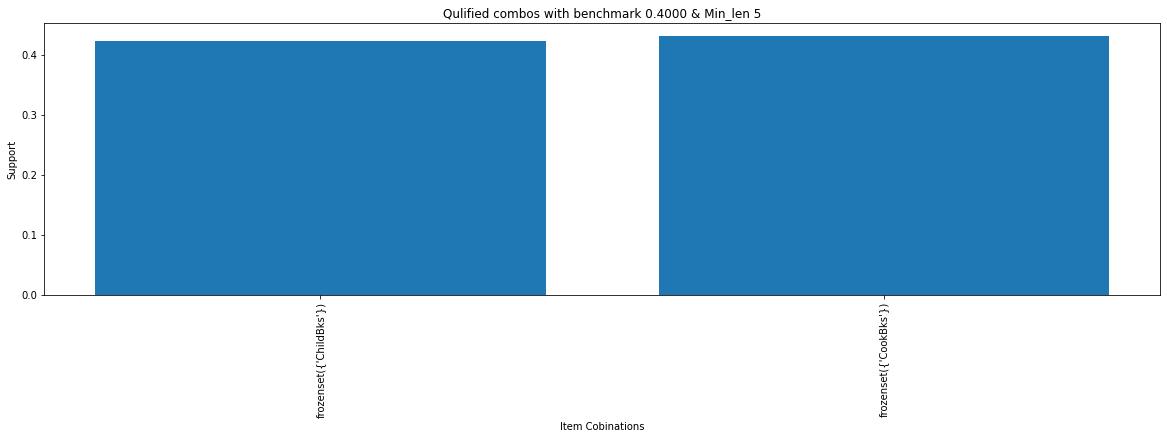

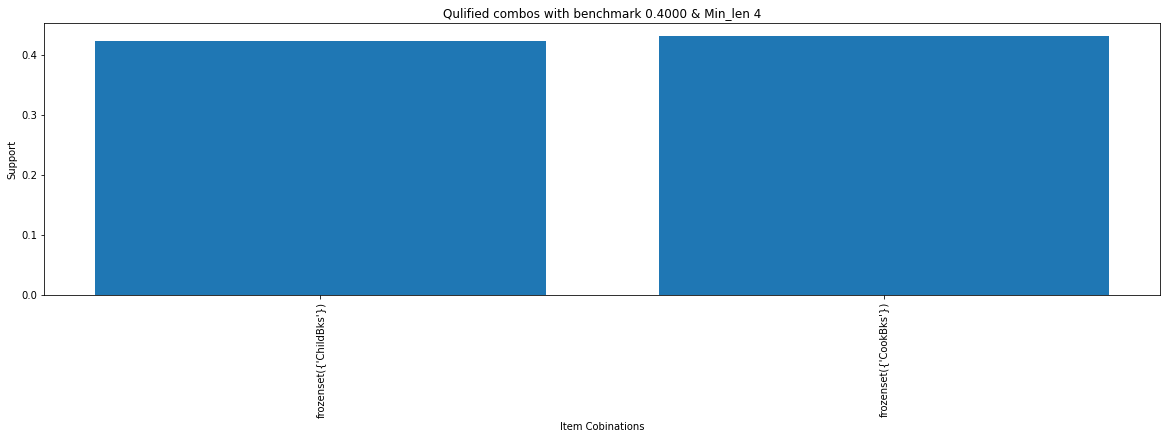

In [11]:
# Visualising the data for same combinations

%matplotlib inline
for i in np.linspace(0.1,0.4,4):
    for x in range(len(rawData.columns)+1,3,-1):
        frequent_items = apriori(rawData,min_support=i,use_colnames=True,max_len=x)
        frequent_items = frequent_items.sort_values(by='support')
        plt.figure(figsize=(20,5))
        plt.bar(x=range(1,len(frequent_items)+1),height=frequent_items.support)
        plt.title(f'Qulified combos with benchmark {i:.4f} & Min_len {x}')
        plt.xticks(list(range(1,len(frequent_items)+1)),frequent_items.itemsets,rotation=90)
        plt.xlabel('Item Cobinations')
        plt.ylabel('Support')
        plt.show()

In [12]:
# final apriori parameters selected are benchmark support 10% and max lenth of item for combo is 3

frequent_items = apriori(rawData,min_support=.1,use_colnames=True,max_len=4)
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [13]:
# Sorting the rules / associations for Support scores

rules.sort_values(by='support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
11,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
26,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
27,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
20,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
21,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
5,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [14]:
# Sorting the rules / associations for Confidence scores

rules.sort_values(by='confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
82,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
88,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
94,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
53,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
52,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
76,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
40,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
47,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
70,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


In [16]:
# Sorting the rules / associations for Lift scores

rules.sort_values(by='lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


# Final Coments

**There is only one association which can be categorised in to actionable rule. i.e. association between 'ItalCook' to 'CookBks' almost every time 'ItalCook' is sold 'CoockBks' is sold. 'CookBks' has greater support than 'ItalCook' hence we can say that 'ItalCook' is dependent on 'CookBks'